In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from math import sqrt
import random



In [48]:
df = pd.read_csv('titanicDataset.csv')
df.head(5)

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.isna().sum()

PassengerId      0
Survived         0
Class            0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df2 = df[['Survived', 'Class', 'Age', 'Embarked']]
df2.dropna(inplace=True)
df2['male'] = df['Sex'] == 'male'
df2.male = df2.male.replace({True: 1, False: 0})
embarked ={"S":0, "C": 1, "Q":2}
df2.Embarked = df2.Embarked.replace(embarked)
print(df2)

     Survived  Class   Age  Embarked  male
0           0      3  22.0         0     1
1           1      1  38.0         1     0
2           1      3  26.0         0     0
3           1      1  35.0         0     0
4           0      3  35.0         0     1
..        ...    ...   ...       ...   ...
885         0      3  39.0         2     0
886         0      2  27.0         0     1
887         1      1  19.0         0     0
889         1      1  26.0         1     1
890         0      3  32.0         2     1

[712 rows x 5 columns]


C:\Users\schauhan2\AppData\Local\Temp\ipykernel_27212\3869968936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\schauhan2\AppData\Local\Temp\ipykernel_27212\3869968936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['male'] = df['Sex'] == 'male'
C:\Users\schauhan2\AppData\Local\Temp\ipykernel_27212\3869968936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

             PassengerId  Survived     Class       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Class          -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Class       -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

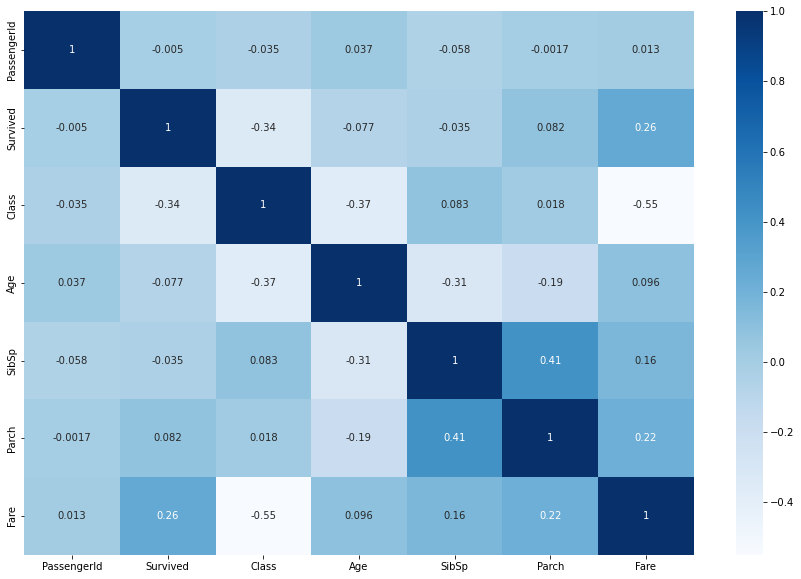

In [51]:
cor = df.corr()
print(cor)
plt.figure(figsize= (15,10))
sb.heatmap(cor, annot=True, cmap="Blues")

<AxesSubplot:xlabel='Class', ylabel='Survived'>

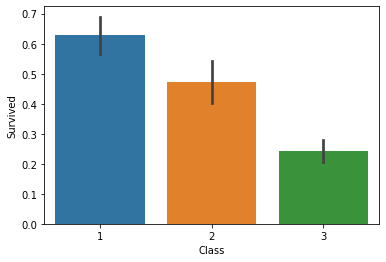

In [52]:
sb.barplot(data=df, x='Class', y='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

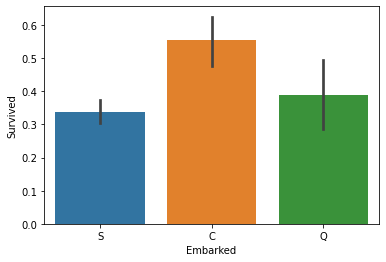

In [53]:
sb.barplot(data=df, x='Embarked', y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

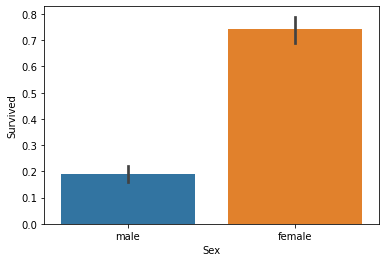

In [54]:
sb.barplot(data=df, x='Sex', y='Survived')

In [55]:
def testTrainSplit(df):
    length = len(df.index)
    splitLimit = int(length * 0.5)
    X_train = df[0: splitLimit]
    y_train = X_train['Survived']
    X_test = df[splitLimit + 1: length]
    y_test = X_test['Survived']
    return X_train, y_train, X_test, y_test

In [56]:
X_train, y_train, X_test, y_test = testTrainSplit(df2)
print(X_train)
print(X_test)

     Survived  Class   Age  Embarked  male
0           0      3  22.0         0     1
1           1      1  38.0         1     0
2           1      3  26.0         0     0
3           1      1  35.0         0     0
4           0      3  35.0         0     1
..        ...    ...   ...       ...   ...
439         0      2  31.0         0     1
440         1      2  45.0         0     0
441         0      3  20.0         0     1
442         0      3  25.0         0     1
443         1      2  28.0         0     0

[356 rows x 5 columns]
     Survived  Class   Age  Embarked  male
446         1      2  13.0         0     0
447         1      1  34.0         0     1
448         1      3   5.0         1     0
449         1      1  52.0         0     1
450         0      2  36.0         0     1
..        ...    ...   ...       ...   ...
885         0      3  39.0         2     0
886         0      2  27.0         0     1
887         1      1  19.0         0     0
889         1      1  26.0    

In [57]:
#https://realpython.com/knn-python/

In [58]:


def distances(train, test):
    distance = {}
    for row in range(len(train.index)):
        survived = train.iat[row, 0]
        classes = train.iat[row, 1]
        age = train.iat[row, 2]
        embarked = train.iat[row, 3]
        sex = train.iat[row, 4]
    for row in range(len(test.index)): 
        survived2 = test.iat[row, 0]
        classes2 = test.iat[row, 1]
        age2 = test.iat[row, 2]
        embarked2 = test.iat[row, 3]
        sex2 = test.iat[row, 4]
        distance[row] = sqrt((survived2-survived)**2 + (classes2-classes)**2 + (age2-age)**2 + (embarked2-embarked)**2 + (sex2-sex)**2)
    return distance

distances(X_train, X_test)
    

{0: 15.0,
 1: 6.164414002968976,
 2: 23.043437243605826,
 3: 24.041630560342615,
 4: 8.12403840463596,
 5: 2.8284271247461903,
 6: 21.071307505705477,
 7: 2.0,
 8: 37.04051835490427,
 9: 22.0,
 10: 20.049937655763422,
 11: 6.244997998398398,
 12: 19.078784028338912,
 13: 20.049937655763422,
 14: 10.14889156509222,
 15: 28.053520278211074,
 16: 27.286672571055636,
 17: 10.14889156509222,
 18: 5.0,
 19: 5.0990195135927845,
 20: 6.164414002968976,
 21: 6.164414002968976,
 22: 2.0,
 23: 6.244997998398398,
 24: 26.019223662515376,
 25: 19.078784028338912,
 26: 22.06807649071391,
 27: 35.014282800023196,
 28: 3.4641016151377544,
 29: 7.0710678118654755,
 30: 30.066592756745816,
 31: 2.6457513110645907,
 32: 19.05255888325765,
 33: 7.211102550927978,
 34: 27.055498516937366,
 35: 43.04648650006177,
 36: 7.211102550927978,
 37: 26.038433132583073,
 38: 3.3166247903554,
 39: 4.358898943540674,
 40: 11.135528725660043,
 41: 7.416198487095663,
 42: 9.1104335791443,
 43: 12.041594578792296,
 44: 1